In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
from rl.analysis import stadium
from importlib import reload
reload(stadium)

<module 'rl.analysis.stadium' from '/home/march/rl/analysis/rl/analysis/stadium.py'>

(-5654.000000000001, 5654.000000000001)

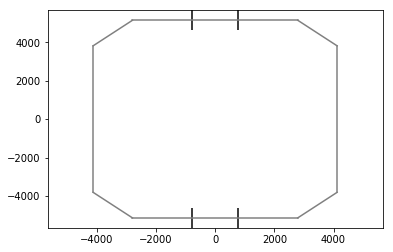

In [26]:
for a, b in zip(stadium.SURFACE_POINTS, stadium.SURFACE_POINTS[1:] + [stadium.SURFACE_POINTS[0]]):
    plot(*zip(a,b), color='grey')
vlines([stadium.GOAL_WIDTH / -2, stadium.GOAL_WIDTH / 2], ymin=stadium.Y_RANGE[0] * 1.1, ymax=stadium.Y_RANGE[0] * .9)
vlines([stadium.GOAL_WIDTH / -2, stadium.GOAL_WIDTH / 2], ymin=stadium.Y_RANGE[1] * 1.1, ymax=stadium.Y_RANGE[1] * .9)
ylim(stadium.Y_RANGE[0] * 1.1, stadium.Y_RANGE[1] * 1.1)
xlim(stadium.Y_RANGE[0] * 1.1, stadium.Y_RANGE[1] * 1.1)

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection(Polygon(*zip())

SyntaxError: invalid syntax (<ipython-input-28-68109e879154>, line 5)

In [29]:
Polygon?